In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
import torch.utils.data as torchdata
import numpy as np
torch.manual_seed(1)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

# What is a Weight decay?
- 딥러닝에서 사용하는 Regularization 기법 중 하나임.
- weight가 너무 커지는 것을 방지하여 다양한 feature를 고려하게 해줌.

# 1. 데이터 생성

<x shape> : torch.Size([50, 2])
<y shape> : torch.Size([50, 1])


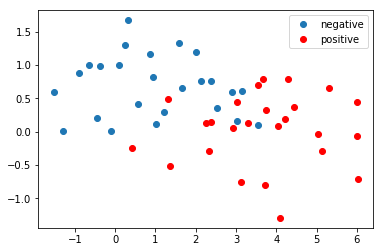

In [2]:
NUM_DATA= 50

x1= torch.linspace(0,5, NUM_DATA) + torch.randn(NUM_DATA)
x2 = torch.cat([torch.zeros(NUM_DATA//2)+torch.abs(torch.randn(NUM_DATA//2)),torch.ones(NUM_DATA//2)-torch.abs(torch.randn(NUM_DATA//2))])
x= torch.cat([x1.unsqueeze(1), x2.unsqueeze(1)],1)
print('<x shape> :', x.shape)

y= torch.cat([torch.zeros(NUM_DATA//2), torch.ones(NUM_DATA//2)])
y= y.unsqueeze(1)
print('<y shape> :', y.shape)

fig, ax = plt.subplots()
ax.plot(x[:,0].data.numpy()[:NUM_DATA//2],x[:,1].data.numpy()[:NUM_DATA//2],'o',label='negative')
ax.plot(x[:,0].data.numpy()[NUM_DATA//2:],x[:,1].data.numpy()[NUM_DATA//2:],'ro',label='positive')
ax.legend()
plt.show()

# 1.1 data loader 만들어보기

In [3]:
class CustomDataset(torchdata.Dataset):
    def __init__(self, x, y):
        self.x= x
        self.y= y
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return len(self.x)
    
custom_dataset= CustomDataset(x, y)

custom_loader= torch.utils.data.DataLoader(dataset=custom_dataset, 
                                           batch_size=10,
                                           shuffle=True,
                                           )

# 2. 모델

In [4]:
class NN(nn.Module):
    def __init__(self,input_size, hidden_size, output_size):
        super(NN,self).__init__()
        self.l1 = nn.Linear(input_size,hidden_size)
        self.l2 = nn.Linear(hidden_size,output_size)
    
    def forward(self,inputs):
        outputs = F.relu(self.l1(inputs))
        return F.sigmoid(self.l2(outputs))

In [17]:
def train_nn(x,y,model,loss_function, optimizer,max_try=20000):
    """
    max_try만큼 epoch을 돌거나
    loss가 0.1보다 작아지면 학습이 끝나는 메소드
    """
    epoch = 0
    loss = Variable(torch.Tensor([1.]))
    while loss.data[0]>0.1 and epoch<=max_try:
        model.zero_grad()
        pred = model(x)
        loss = loss_function(pred,y)
        loss.backward()
        optimizer.step()
        epoch+=1
    print("done with %d epochs, loss : %.3f" % (epoch,loss.data[0]))
    
    return model

In [6]:
def plot_decision_region(x,y,model):
    X_p = x.data.numpy()
    y_p = y.data.numpy().reshape(NUM_DATA)
    markers = ('x', 's')
    colors = ('blue', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y_p))])

    # plot the decision surface
    x1_min, x1_max = X_p[:, 0].min() - 1, X_p[:, 0].max() + 1
    x2_min, x2_max = X_p[:, 1].min() - 1, X_p[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))

    X_pp = Variable(torch.cat([torch.Tensor(xx1).view(-1,1),torch.Tensor(xx2).view(-1,1)],1))
    Z = torch.round(model(X_pp))
    Z = Z.float().data.numpy()
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y_p)):
        plt.scatter(x=X_p[y_p == cl, 0], 
                    y=X_p[y_p == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

# 3 테스트
### 3.1 hidden node 3

/Users/a408109/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  


done with 20001 epochs, loss : 0.290


/Users/a408109/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  from ipykernel import kernelapp as app


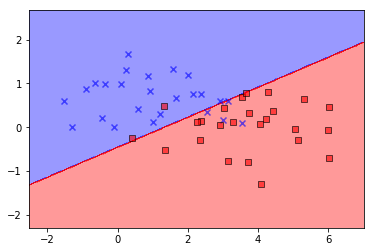

In [11]:
INPUT_SIZE= 2
HIDDEN_SIZE=3
OUTPUT_SIZE=1
LR=0.05

model = NN(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE)
loss_function =nn.BCELoss()
optimizer = optim.SGD(model.parameters(),lr=LR)

model = train_nn(x, y,model,loss_function, optimizer)
plot_decision_region(x,y,model)


### 3.2 hidden node : 20 

/Users/a408109/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  


done with 20001 epochs, loss : 0.140


/Users/a408109/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  from ipykernel import kernelapp as app


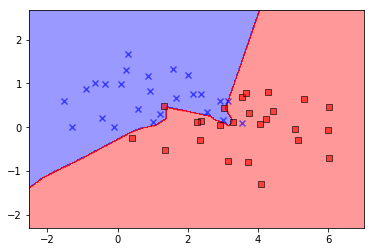

In [12]:
INPUT_SIZE= 2
HIDDEN_SIZE=20
OUTPUT_SIZE=1
LR=0.05

model = NN(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE)
loss_function =nn.BCELoss()
optimizer = optim.SGD(model.parameters(),lr=LR)

model = train_nn(x, y,model,loss_function, optimizer)
plot_decision_region(x,y,model)


### 3.3 Wight Decay (L2 norm)
- Lambda 0.001

/Users/a408109/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  


done with 20001 epochs, loss : 0.213


/Users/a408109/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  from ipykernel import kernelapp as app


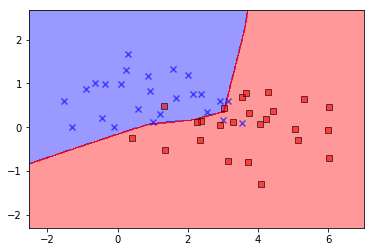

In [14]:
INPUT_SIZE= 2
HIDDEN_SIZE=20
OUTPUT_SIZE=1
LR=0.05
LAMBDA=0.001

model = NN(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE)
loss_function =nn.BCELoss()
optimizer = optim.SGD(model.parameters(),lr=LR, weight_decay=LAMBDA) # l2 norm

model = train_nn(x, y,model,loss_function, optimizer)
plot_decision_region(x,y,model)


### 3.4 Wight Decay (L2 norm)
- Lambda 0.01

/Users/a408109/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  


done with 20001 epochs, loss : 0.292


/Users/a408109/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  from ipykernel import kernelapp as app


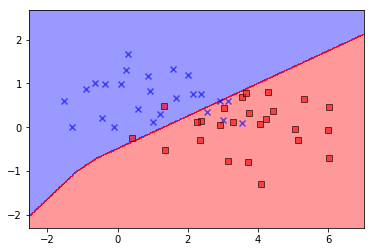

In [15]:
INPUT_SIZE= 2
HIDDEN_SIZE=20
OUTPUT_SIZE=1
LR=0.05
LAMBDA=0.01

model = NN(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE)
loss_function =nn.BCELoss()
optimizer = optim.SGD(model.parameters(),lr=LR, weight_decay=LAMBDA) # l2 norm

model = train_nn(x, y,model,loss_function, optimizer)
plot_decision_region(x,y,model)


### Suggested Readings
- http://cs231n.github.io/neural-networks-1/